In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vinay\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3


In [8]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [20]:
# Load and explore the dataset
train_dir = r'C:\Users\vinay\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3\the_wildfire_dataset_2n_version\test'
val_dir = r'C:\Users\vinay\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3\the_wildfire_dataset_2n_version\train'
test_dir = r'C:\Users\vinay\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3\the_wildfire_dataset_2n_version\val'

In [22]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['fire', 'nofire']


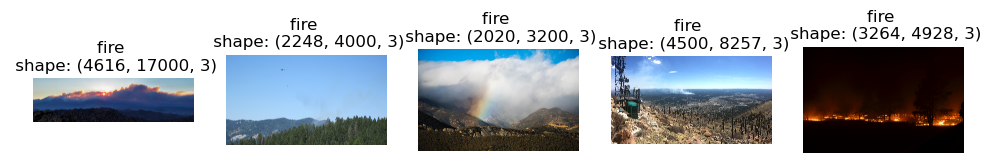

In [24]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

C:\Users\vinay\anaconda3\Lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\vinay\anaconda3\Lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


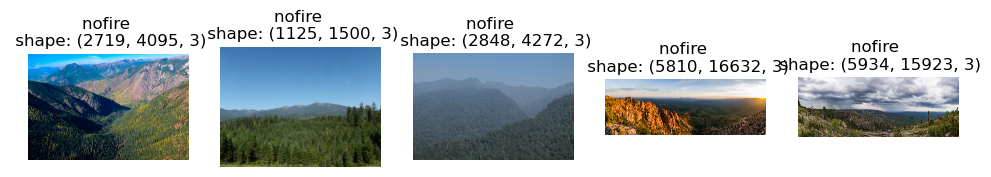

In [28]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [34]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 410 images belonging to 2 classes.
Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


In [36]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [2]:
from tensorflow.keras.models import load_model

model = load_model('FFD.keras')  # Make sure this file is in the same folder


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [10]:
os.listdir(r'C:\Users\vinay\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3\the_wildfire_dataset_2n_version\test\fire')

['19196558588_267f24b847_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '27002088114_aa5cc7f353_o.jpg',
 '27335331950_39b376eddd_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '27951228213_2dd961ac1f_o.jpg',
 '27968020506_5f1a59f2a5_o.jpg',
 '28020330864_d7a2429a7e_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '28431967367_37bc44b0c1_o.jpg',
 '28431975607_7fc4cc466c_o.jpg',
 '28431976467_0ff1af4b17_o.jpg',
 '28528946360_5254cdafba_o.jpg',
 '28537699003_1a422593ca_o.jpg',
 '28809454424_c694988115_o.jpg',
 '28811952773_710e9d2d23_o.jpg',
 '28839451467_99ba52a28b_o.jpg',
 '29050868872_a81cc9e411_o.jpg',
 '29071683967_b1ed99cb89_o.jpg',
 '29123316786_b55ae67b44_o.jpg',
 '29217093202_705f9dda46_o.jpg',
 '29431355988_ba5c97c131_o.jpg',
 '30227808988_2cd8f53145_o.jpg',
 '32923774463_8a894851d1_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '33100052071_1903ff386b_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '33352231150_03c54e5e9b_o.jpg',
 '34025009

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


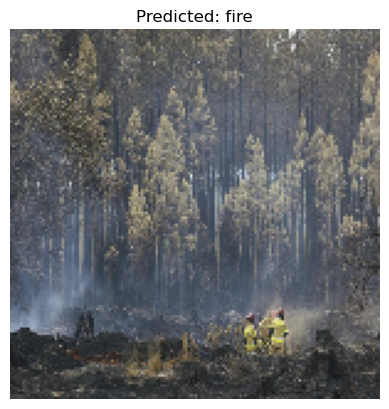

In [44]:
predict_fire(r'C:\Users\vinay\OneDrive\Desktop\mnp 2\Forest fire detection\Samples to test\FST wildfires photo album 01.jpg')